Project Summary and Insights: Titanic Dataset Analysis
I'm excited to be part of the VAM_AI course, where I'm enhancing my skills in Python, Artificial Intelligence, Data Analysis, and other technologies. My goal is to build an app idea by the end of the course, and my first challenge was to analyze a freely available dataset on Titanic passengers, which felt like traveling back in time!

Uploading and Analyzing the Dataset:
I started by exploring the data, understanding missing information, columns, data types, and overall structure.

Data Transformation and Cleaning:
During analysis, I identified key insights and made important updates to the dataset, ensuring the data was clean and meaningful.

Visualizing Insights with Charts:
With a clean dataset, I moved on to creating visualizations to extract valuable insights.

Key Insights:
Age: Distribution, Relationship Between Class, Survival
Fares: As expected, average fares for Class 1 were significantly higher than for Classes 2 and 3.

clear view of fare values per class, number of passengers per class, correlation between all numerical columns

1: Uploading and Analysing the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings


In [2]:

# Suppress all warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [3]:
# Load the Titanic dataset from a URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

# Read the dataset into a pandas DataFrame
titanic_df = pd.read_csv(url)

In [4]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# Summary information about the dataset
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
# Checking missing values in each column
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Display unique values for each specified column
columns_of_interest = ['Survived', 'Pclass', 'Cabin', 'Embarked', 'Sex']

for column in columns_of_interest:
    unique_values = titanic_df[column].unique()
    print(f"Unique values in '{column}':\n{unique_values}\n")


Unique values in 'Survived':
[0 1]

Unique values in 'Pclass':
[3 1 2]

Unique values in 'Cabin':
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B

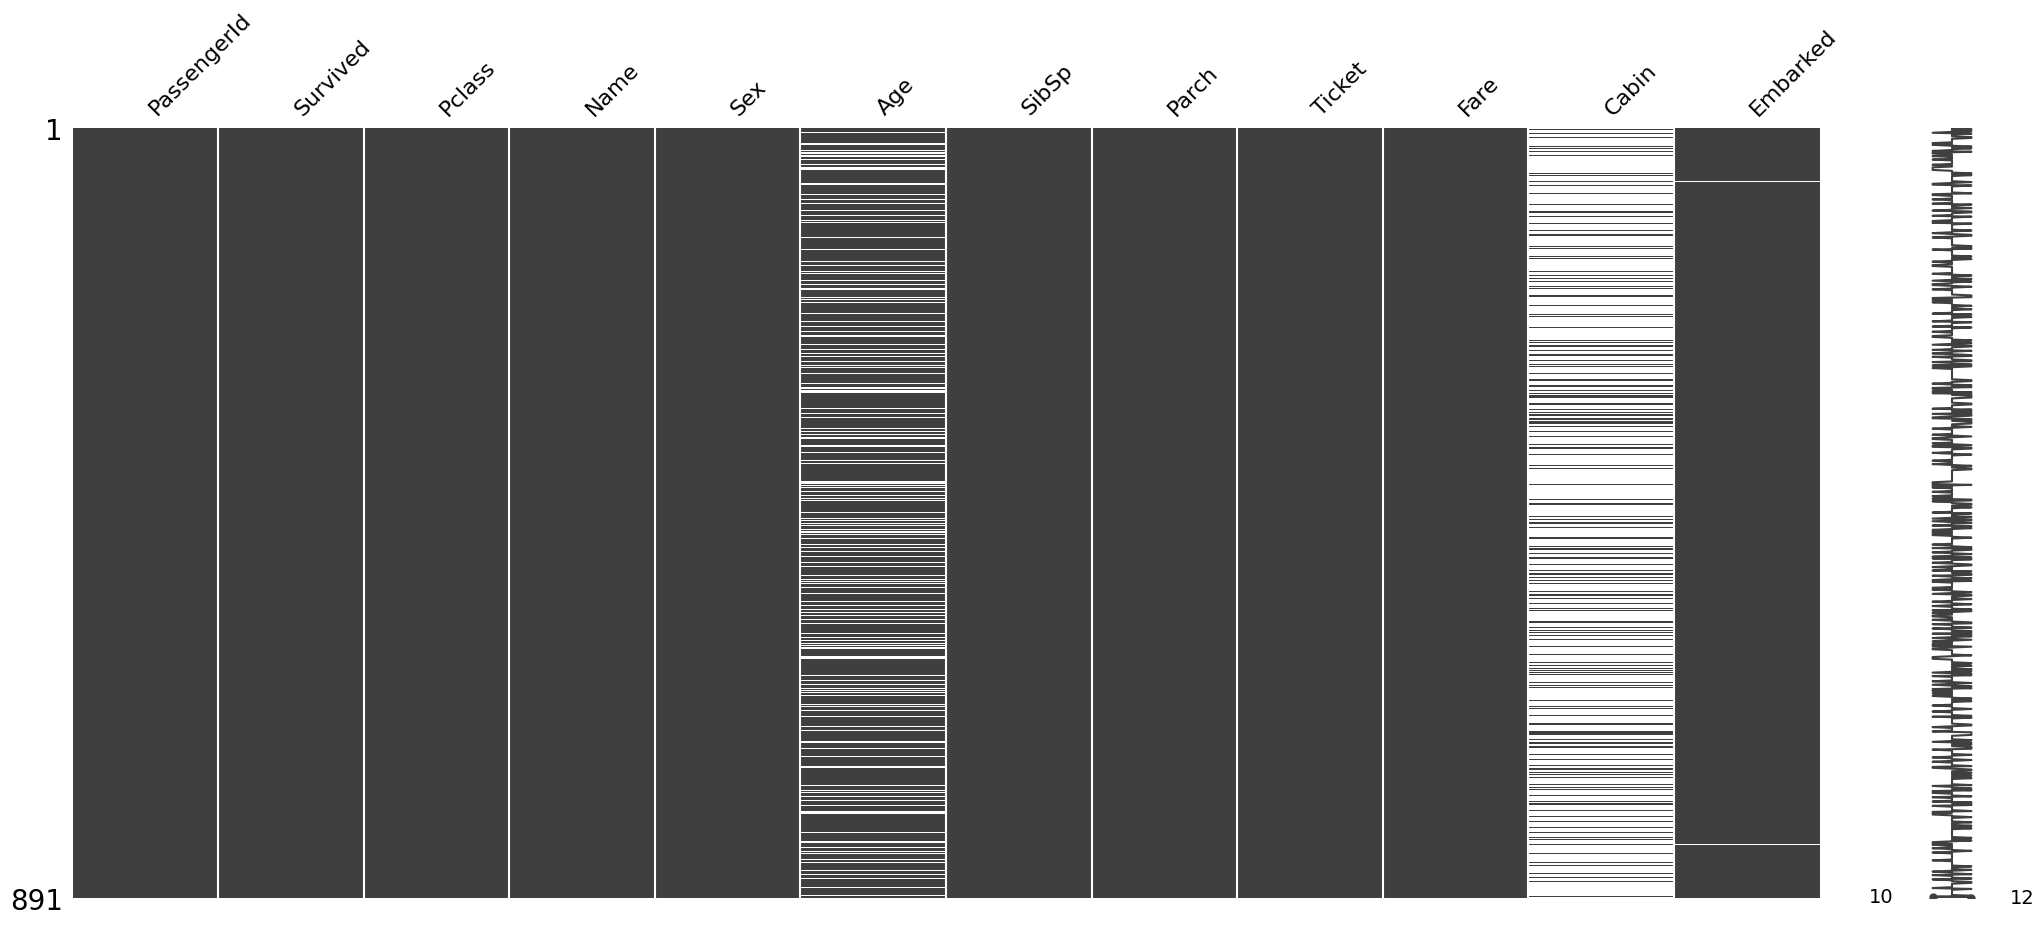

In [8]:
# Visualize missing values as a matrix
msno.matrix(titanic_df)
plt.show()


2: Transform and update the dataset

In [9]:
titanic_df_copy = titanic_df.copy()  # Create a copy of the original dataframe


titanic_df_copy['Survived'] = titanic_df_copy['Survived'].replace({0: 'Died', 1: 'Survived'})


In [10]:
# Replace missing values in 'Cabin' with 'Don't have this information'
titanic_df_copy['Cabin'].fillna("Undefined", inplace=True)

# Replace missing values in 'Embarked' with 'Undefined'
titanic_df_copy['Embarked'].fillna('Undefined', inplace=True)


In [11]:
# Checking missing values in each column
print(titanic_df_copy.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64


In [12]:
# Display unique values for each specified column
columns_of_interest = ['Survived', 'Pclass', 'Cabin', 'Embarked', 'Sex']

for column in columns_of_interest:
    unique_values = titanic_df_copy[column].unique()
    print(f"Unique values in '{column}':\n{unique_values}\n")


Unique values in 'Survived':
['Died' 'Survived']

Unique values in 'Pclass':
[3 1 2]

Unique values in 'Cabin':
['Undefined' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78'
 'D33' 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26'
 'C110' 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7'
 'C49' 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87'
 'B77' 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26'
 'C106' 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124'
 'C91' 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44'
 'A34' 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20'
 'B79' 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101'
 'C68' 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48'
 'E58' 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24'
 'C90' 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3'
 'D6' 'B82 B84'

In [13]:
# Rename the 'Survived' column to avoid confusion
titanic_df_copy.rename(columns={'Survived': 'Survival Status'}, inplace=True)


In [14]:
# Display unique values for each specified column
columns_of_interest = ['Survival Status', 'Pclass', 'Cabin', 'Embarked', 'Sex']

for column in columns_of_interest:
    unique_values = titanic_df_copy[column].unique()
    print(f"Unique values in '{column}':\n{unique_values}\n")


Unique values in 'Survival Status':
['Died' 'Survived']

Unique values in 'Pclass':
[3 1 2]

Unique values in 'Cabin':
['Undefined' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78'
 'D33' 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26'
 'C110' 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7'
 'C49' 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87'
 'B77' 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26'
 'C106' 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124'
 'C91' 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44'
 'A34' 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20'
 'B79' 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101'
 'C68' 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48'
 'E58' 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24'
 'C90' 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3'
 'D6' 'B

In [15]:
# Drop rows where the 'Age' column is missing
titanic_df_copy = titanic_df_copy.dropna(subset=['Age'])


In [16]:
# Checking missing values in each column
print(titanic_df_copy.isnull().sum())

PassengerId        0
Survival Status    0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           0
dtype: int64


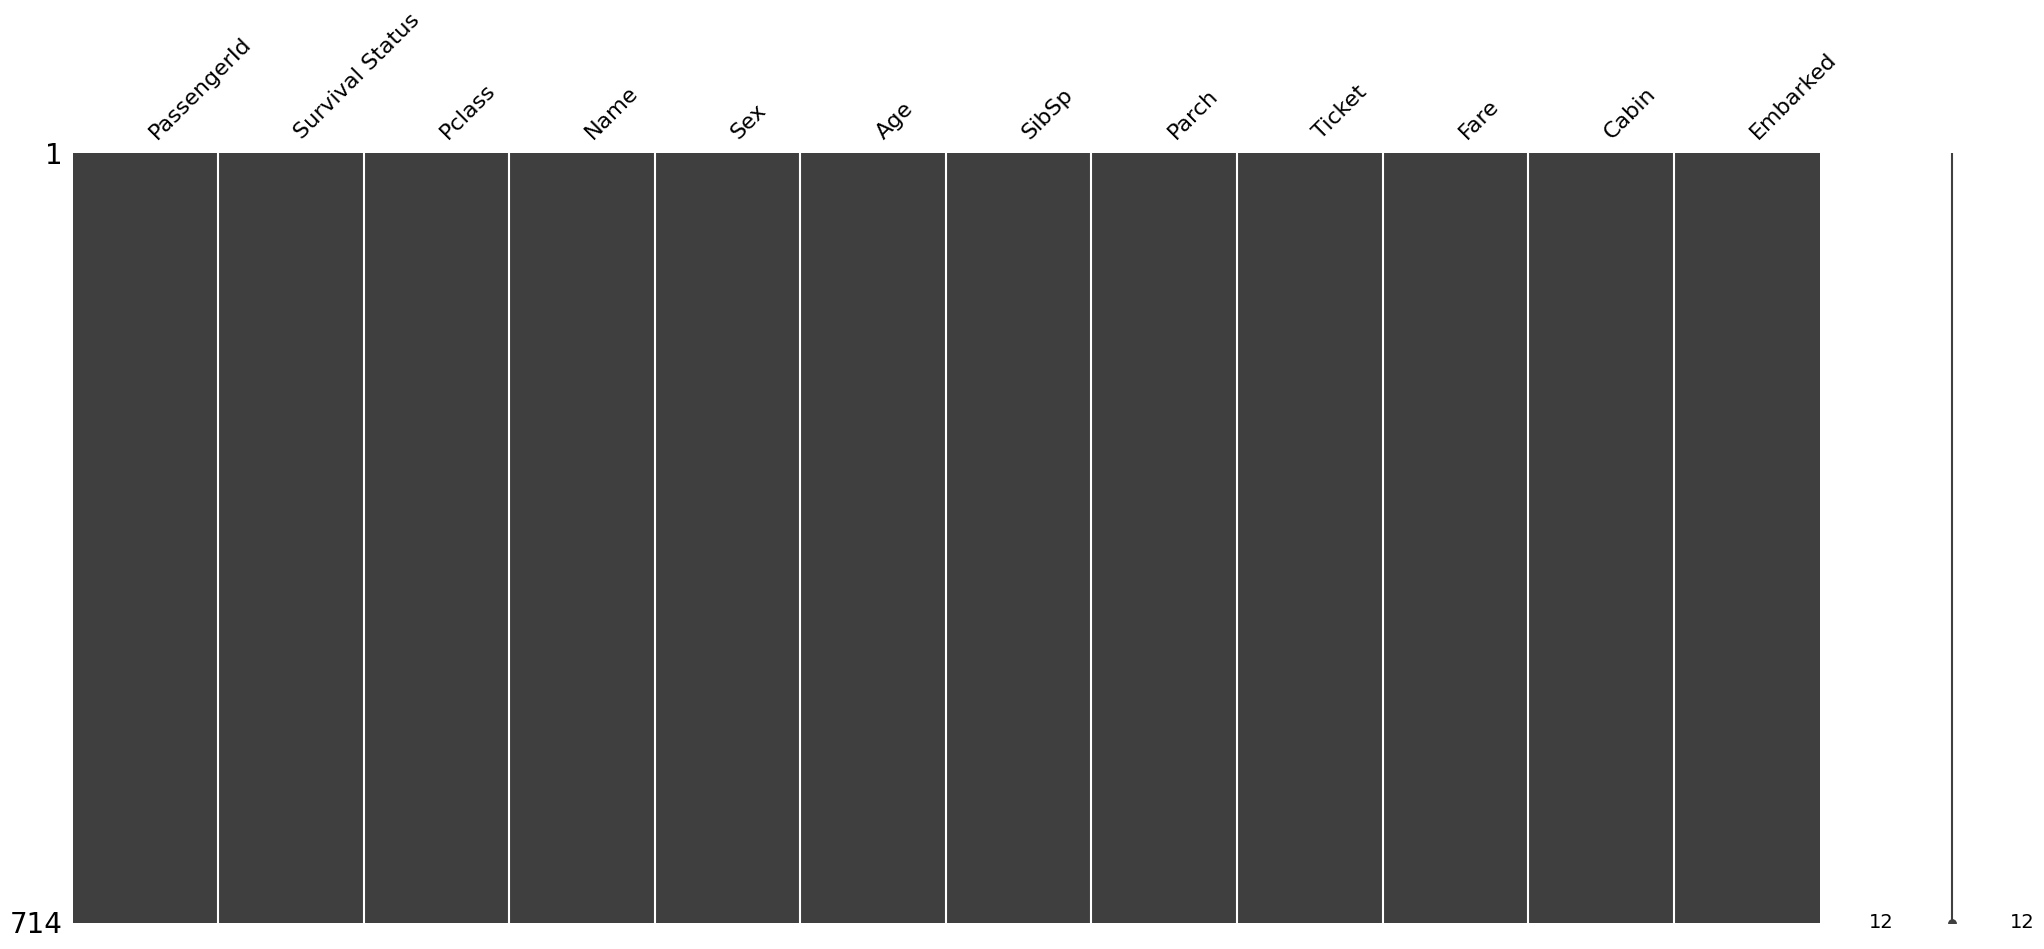

In [17]:


# Visualize missing values as a matrix
msno.matrix(titanic_df_copy)
plt.show()


In [18]:
# Count the number of passengers with fare 0.0 in each class
zero_fare_count = titanic_df_copy[titanic_df_copy['Fare'] == 0.0].groupby('Pclass')['Fare'].count()

In [19]:
zero_fare_count

Pclass
1    3
3    4
Name: Fare, dtype: int64

In [23]:
# Remove rows where the 'Fare' is 0.0
titanic_df_copy = titanic_df_copy[titanic_df_copy['Fare'] > 0]



In [24]:
# Count the number of passengers with fare 0.0 in each class
zero_fare_count = titanic_df_copy[titanic_df_copy['Fare'] == 0.0].groupby('Pclass')['Fare'].count()

# Display the result
print(zero_fare_count)


Series([], Name: Fare, dtype: int64)


In [25]:
# Calculate the maximum and minimum fare for each passenger class
fare_summary = titanic_df_copy.groupby('Pclass')['Fare'].agg(['max', 'min']).sort_index()

# Display the result
print(fare_summary)


             max      min
Pclass                   
1       512.3292   5.0000
2        73.5000  10.5000
3        56.4958   4.0125


In [26]:
# Summary information about the dataset
print(titanic_df_copy.info())

<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      707 non-null    int64  
 1   Survival Status  707 non-null    object 
 2   Pclass           707 non-null    int64  
 3   Name             707 non-null    object 
 4   Sex              707 non-null    object 
 5   Age              707 non-null    float64
 6   SibSp            707 non-null    int64  
 7   Parch            707 non-null    int64  
 8   Ticket           707 non-null    object 
 9   Fare             707 non-null    float64
 10  Cabin            707 non-null    object 
 11  Embarked         707 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 71.8+ KB
None


3 Create charts

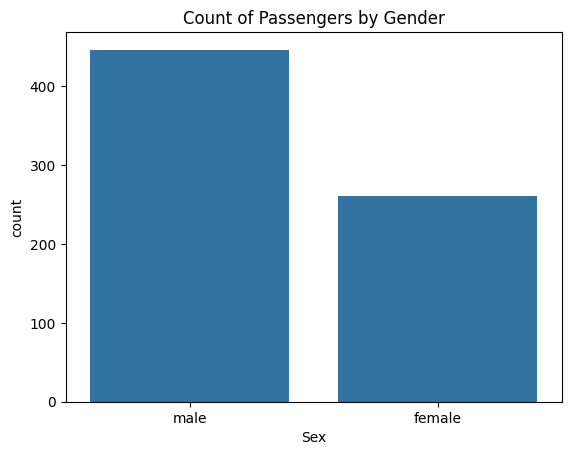

In [27]:
# Count plot for the 'Sex' column
sns.countplot(data=titanic_df_copy, x='Sex')
plt.title('Count of Passengers by Gender')
plt.show()



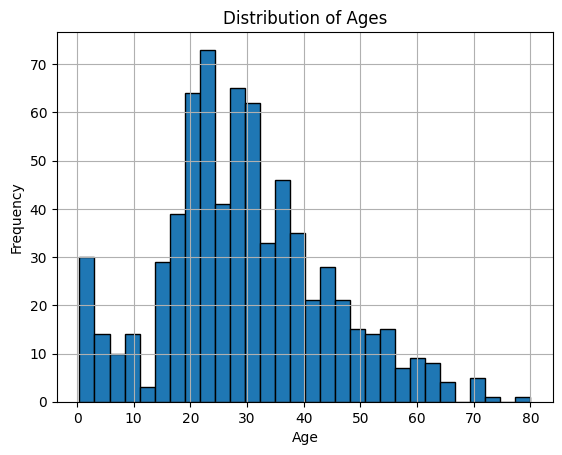

In [28]:
# Histogram of passenger ages
titanic_df_copy['Age'].hist(bins=30, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()


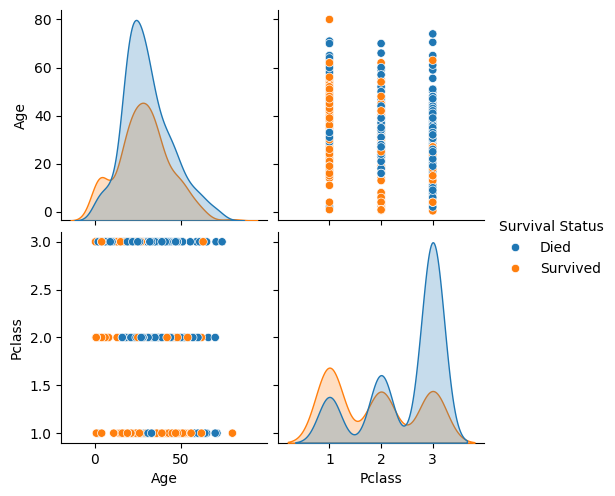

In [29]:
# Pairplot for selected columns
sns.pairplot(titanic_df_copy, hue='Survival Status', vars=['Age','Pclass'])
plt.show()

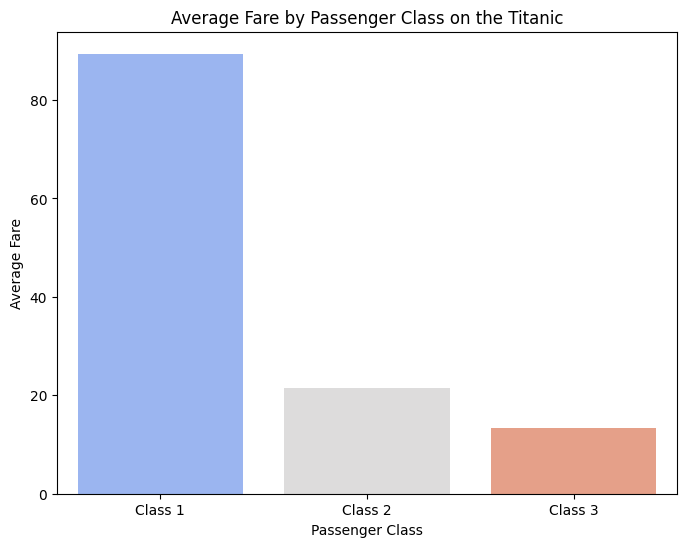

In [30]:

# Calculate the average fare for each class
avg_fare_by_class = titanic_df_copy.groupby('Pclass')['Fare'].mean().sort_index()

# Plotting a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_fare_by_class.index, y=avg_fare_by_class.values, palette='coolwarm')

plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.title('Average Fare by Passenger Class on the Titanic')
plt.xticks([0, 1, 2], ['Class 1', 'Class 2', 'Class 3'])
plt.show()


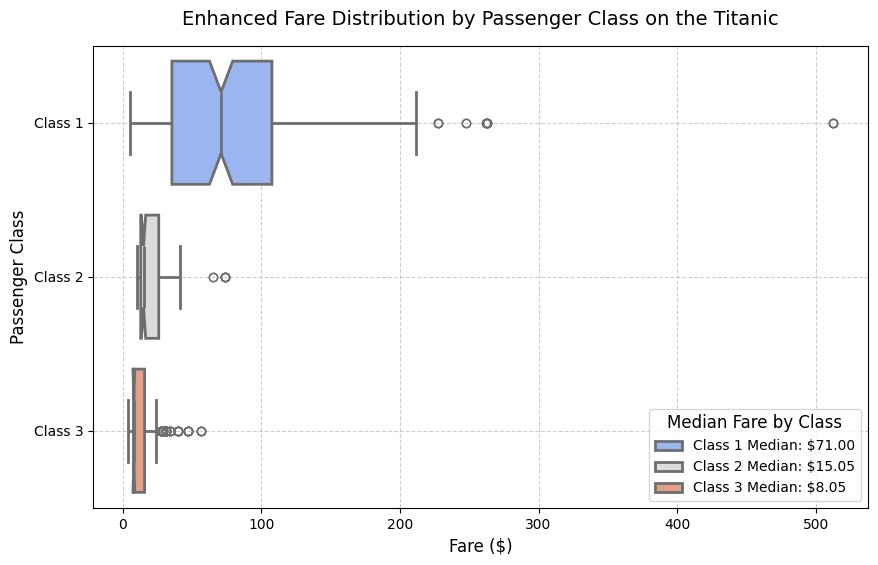

In [31]:

# Plotting a horizontal box plot with enhanced styling
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=titanic_df_copy, 
    x='Fare', 
    y='Pclass', 
    palette='coolwarm', 
    orient='h', 
    showfliers=True,   # Show outliers explicitly
    linewidth=2,       # Thicker lines for better visibility
    notch=True         # Add notches to the box plot
)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Improved labels and title
plt.ylabel('Passenger Class', fontsize=12)
plt.xlabel('Fare ($)', fontsize=12)
plt.title('Enhanced Fare Distribution by Passenger Class on the Titanic', fontsize=14, pad=15)

# Set custom y-tick labels
plt.yticks([0, 1, 2], ['Class 1', 'Class 2', 'Class 3'])

# Calculate median values
medians = titanic_df_copy.groupby('Pclass')['Fare'].median().sort_index()

# Create a custom legend for median values
median_labels = [f'Class {i+1} Median: ${median:.2f}' for i, median in enumerate(medians)]
plt.legend(
    median_labels, 
    title='Median Fare by Class', 
    loc='lower right',  # Position the legend at the bottom right
    frameon=True, 
    fontsize=10, 
    title_fontsize=12
)

plt.show()


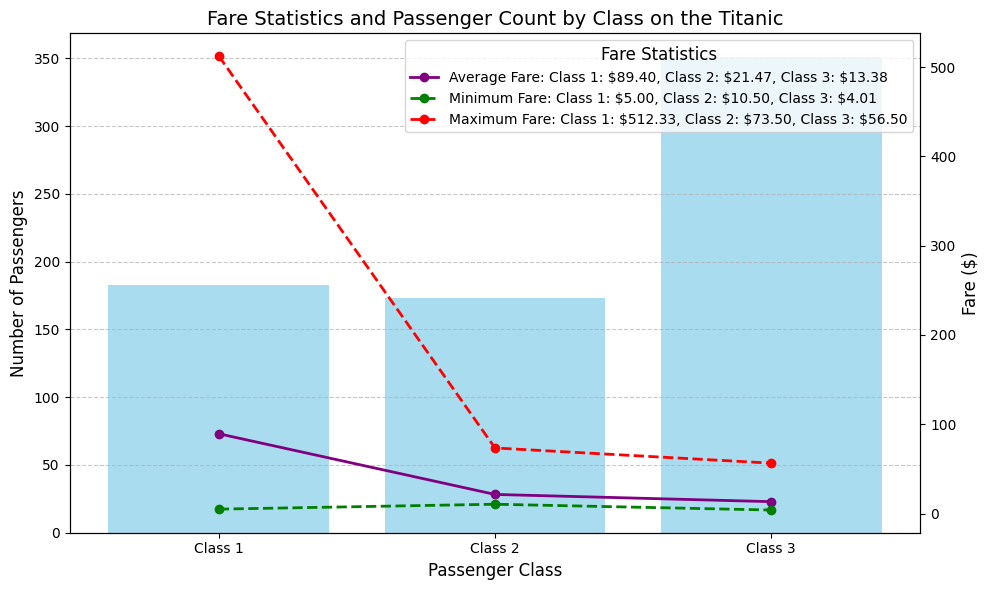

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate statistics per class
avg_fare_per_class = titanic_df_copy.groupby('Pclass')['Fare'].mean().sort_index()
min_fare_per_class = titanic_df_copy.groupby('Pclass')['Fare'].min().sort_index()
max_fare_per_class = titanic_df_copy.groupby('Pclass')['Fare'].max().sort_index()
passenger_count_per_class = titanic_df_copy['Pclass'].value_counts().sort_index()

# Create a figure with a dual-axis chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for the number of passengers
bars = ax1.bar(passenger_count_per_class.index, passenger_count_per_class.values, color='skyblue', alpha=0.7)
ax1.set_ylabel('Number of Passengers', fontsize=12)
ax1.set_xlabel('Passenger Class', fontsize=12)
ax1.set_title('Fare Statistics and Passenger Count by Class on the Titanic', fontsize=14)
ax1.set_xticks([1, 2, 3])
ax1.set_xticklabels(['Class 1', 'Class 2', 'Class 3'])
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create a second y-axis for the fare statistics
ax2 = ax1.twinx()

# Plot average, min, and max fare lines
avg_line, = ax2.plot(avg_fare_per_class.index, avg_fare_per_class.values, color='purple', marker='o', linewidth=2, label='Average Fare')
min_line, = ax2.plot(min_fare_per_class.index, min_fare_per_class.values, color='green', marker='o', linestyle='--', linewidth=2, label='Minimum Fare')
max_line, = ax2.plot(max_fare_per_class.index, max_fare_per_class.values, color='red', marker='o', linestyle='--', linewidth=2, label='Maximum Fare')

ax2.set_ylabel('Fare ($)', fontsize=12)

# Create custom labels with values for the legend
legend_labels = [
    f'Average Fare: Class 1: ${avg_fare_per_class[1]:.2f}, Class 2: ${avg_fare_per_class[2]:.2f}, Class 3: ${avg_fare_per_class[3]:.2f}',
    f'Minimum Fare: Class 1: ${min_fare_per_class[1]:.2f}, Class 2: ${min_fare_per_class[2]:.2f}, Class 3: ${min_fare_per_class[3]:.2f}',
    f'Maximum Fare: Class 1: ${max_fare_per_class[1]:.2f}, Class 2: ${max_fare_per_class[2]:.2f}, Class 3: ${max_fare_per_class[3]:.2f}'
]

# Add legend with detailed information at the top right
ax2.legend([avg_line, min_line, max_line], legend_labels, loc='upper right', frameon=True, fontsize=10, title='Fare Statistics', title_fontsize=12)

plt.tight_layout()
plt.show()


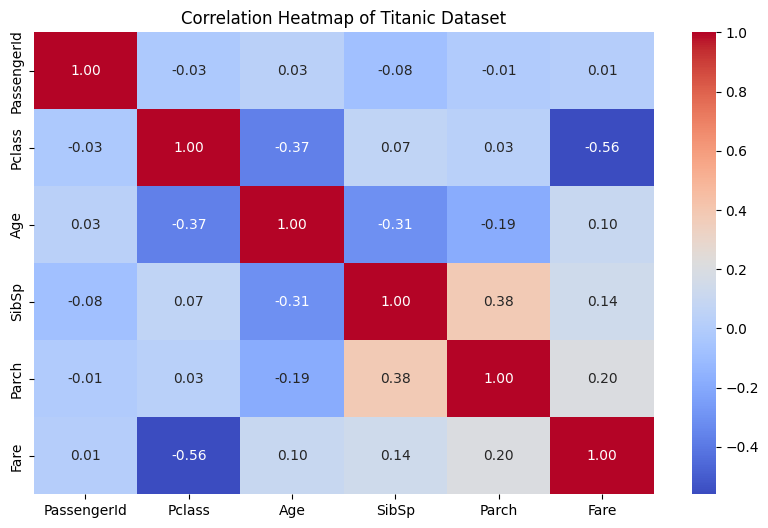

In [41]:
# Select only the numeric columns for the correlation heatmap
numeric_data = titanic_df_copy.select_dtypes(include=['float64', 'int64'])

# Heatmap to show correlations between numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()
